In [1]:
from statsmodels.tsa.ar_model import AutoReg
from random import random
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
ff = pd.read_csv('C:\\Users\\xinya\\PhD\\Researches\\Finance CAPM\\FF_extracted.csv')
# ff.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)
ff[['Mkt-RF', 'SMB', 'HML', 'RF']] = ff[['Mkt-RF', 'SMB', 'HML', 'RF']]/100
ff

,Date,Mkt-RF,SMB,HML,RF
0,19260701,0.0010,-0.0025,-0.0027,0.00009
1,19260702,0.0045,-0.0033,-0.0006,0.00009
2,19260706,0.0017,0.0030,-0.0039,0.00009
3,19260707,0.0009,-0.0058,0.0002,0.00009
4,19260708,0.0021,-0.0038,0.0019,0.00009
...,...,...,...,...,...
25538,20230725,0.0025,-0.0004,-0.0079,0.00022
25539,20230726,0.0002,0.0068,0.0103,0.00022
25540,20230727,-0.0074,-0.0090,0.0027,0.00022
25541,20230728,0.0114,0.0053,-0.0033,0.00022


In [3]:
port_10 = pd.read_csv('C:\\Users\\xinya\\PhD\\Researches\\Finance CAPM\\10_industry_protfolio_extracted.csv')
port_10[['NoDur','Durbl','Manuf','Enrgy','HiTec','Telcm','Shops','Hlth ','Utils','Other']] = port_10[['NoDur','Durbl','Manuf',
                                                                                                     'Enrgy','HiTec','Telcm','Shops','Hlth ',
                                                                                                     'Utils','Other']]/100
port_10 = pd.merge(ff, port_10, on='Date')
port_10

,Date,Mkt-RF,SMB,HML,RF,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,19260701,0.0010,-0.0025,-0.0027,0.00009,0.0002,-0.0028,-0.0023,0.0057,-0.0021,-0.0002,-0.0001,0.0097,0.0061,0.0020
1,19260702,0.0045,-0.0033,-0.0006,0.00009,0.0029,0.0107,0.0081,0.0064,0.0036,0.0026,0.0001,0.0013,0.0047,0.0010
2,19260706,0.0017,0.0030,-0.0039,0.00009,0.0024,0.0072,0.0022,0.0017,0.0047,0.0017,-0.0023,0.0023,0.0073,-0.0018
3,19260707,0.0009,-0.0058,0.0002,0.00009,0.0027,0.0006,0.0023,-0.0004,-0.0010,0.0032,-0.0059,0.0033,0.0017,0.0016
4,19260708,0.0021,-0.0038,0.0019,0.00009,0.0069,0.0005,0.0015,0.0012,0.0035,0.0040,-0.0036,0.0091,-0.0020,0.0039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25538,20230725,0.0025,-0.0004,-0.0079,0.00022,-0.0001,-0.0157,0.0029,0.0057,0.0095,-0.0066,0.0006,-0.0019,0.0014,-0.0020
25539,20230726,0.0002,0.0068,0.0103,0.00022,0.0033,-0.0005,0.0020,-0.0011,-0.0025,-0.0021,-0.0002,-0.0014,0.0004,0.0056
25540,20230727,-0.0074,-0.0090,0.0027,0.00022,-0.0087,-0.0244,-0.0028,-0.0055,-0.0045,0.0003,-0.0050,-0.0058,-0.0159,-0.0122
25541,20230728,0.0114,0.0053,-0.0033,0.00022,0.0092,0.0288,0.0120,0.0030,0.0170,0.0093,0.0124,0.0078,-0.0012,0.0052


In [4]:
port10_ourdates = port_10[(port_10['Date'] >= 20030910) & (port_10['Date'] <= 20201231)]
columns_to_remove = ['SMB', 'HML', 'RF']
port10_ourdates = port10_ourdates.drop(columns=columns_to_remove)
port10_ourdates

,Date,Mkt-RF,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
20537,20030910,-0.0137,0.0017,-0.0206,-0.0178,-0.0063,-0.0320,-0.0108,-0.0067,0.0000,0.0004,-0.0144
20538,20030911,0.0062,0.0051,0.0050,0.0056,-0.0006,0.0118,-0.0020,0.0102,0.0046,-0.0008,0.0062
20539,20030912,0.0023,-0.0007,0.0077,0.0044,-0.0034,0.0050,0.0000,0.0008,0.0022,0.0057,0.0021
20540,20030915,-0.0035,-0.0033,-0.0024,-0.0026,-0.0060,-0.0067,-0.0108,0.0052,-0.0024,-0.0049,-0.0030
20541,20030916,0.0140,0.0035,0.0146,0.0123,0.0047,0.0265,0.0178,0.0103,0.0063,0.0075,0.0149
...,...,...,...,...,...,...,...,...,...,...,...,...
24891,20201224,0.0021,0.0030,0.0141,0.0035,-0.0072,0.0038,0.0029,-0.0008,-0.0007,0.0060,0.0025
24892,20201228,0.0046,0.0035,-0.0007,-0.0019,-0.0050,0.0079,0.0096,0.0163,-0.0056,0.0026,0.0056
24893,20201229,-0.0040,-0.0038,-0.0006,-0.0058,-0.0065,-0.0064,0.0009,0.0006,-0.0004,-0.0019,-0.0031
24894,20201230,0.0027,0.0023,0.0308,0.0084,0.0189,-0.0020,0.0000,-0.0037,0.0028,0.0053,0.0062


In [5]:
subtract_column = 'RF'

for column in port10_ourdates.columns:
    if column not in ['Date','Mkt-RF', 'SMB','HML','RF']:
        new_column_name = f"{column}-{subtract_column}"
        port10_ourdates[new_column_name] = port10_ourdates[column] - port_10[subtract_column]
port10_ourdates = port10_ourdates[['Date', 'Mkt-RF', 'NoDur-RF','Durbl-RF','Manuf-RF','Enrgy-RF','HiTec-RF','Telcm-RF','Shops-RF',
                                   'Hlth -RF','Utils-RF','Other-RF']]
port10_ourdates.head()

,Date,Mkt-RF,NoDur-RF,Durbl-RF,Manuf-RF,Enrgy-RF,HiTec-RF,Telcm-RF,Shops-RF,Hlth -RF,Utils-RF,Other-RF
20537,20030910,-0.0137,0.00166,-0.02064,-0.01784,-0.00634,-0.03204,-0.01084,-0.00674,-0.00004,0.00036,-0.01444
20538,20030911,0.0062,0.00506,0.00496,0.00556,-0.00064,0.01176,-0.00204,0.01016,0.00456,-0.00084,0.00616
20539,20030912,0.0023,-0.00074,0.00766,0.00436,-0.00344,0.00496,-0.00004,0.00076,0.00216,0.00566,0.00206
20540,20030915,-0.0035,-0.00334,-0.00244,-0.00264,-0.00604,-0.00674,-0.01084,0.00516,-0.00244,-0.00494,-0.00304
20541,20030916,0.0140,0.00346,0.01456,0.01226,0.00466,0.02646,0.01776,0.01026,0.00626,0.00746,0.01486


In [6]:
port10_ourdates['Date'] = pd.to_datetime(port10_ourdates['Date'], format='%Y%m%d')
port10_ourdates.set_index('Date', inplace=True)
rolling_window_size = 252
rolling_beta_df = pd.DataFrame(index=port10_ourdates.index)
for column in port10_ourdates.columns[1:]:
    print(column)
    rolling_beta_df[column + '_beta'] = port10_ourdates['Mkt-RF'].rolling(window=rolling_window_size).apply(
        lambda x: linregress(x, port10_ourdates[column].loc[x.index]).slope)

NoDur-RF
Durbl-RF
Manuf-RF
Enrgy-RF
HiTec-RF
Telcm-RF
Shops-RF
Hlth -RF
Utils-RF
Other-RF


In [7]:
port10_ourdates.reset_index(inplace = True)
port10_ourdates['Date'] = port10_ourdates['Date'].dt.strftime('%Y%m%d').astype(int)
port10_ourdates

,Date,Mkt-RF,NoDur-RF,Durbl-RF,Manuf-RF,Enrgy-RF,HiTec-RF,Telcm-RF,Shops-RF,Hlth -RF,Utils-RF,Other-RF
0,20030910,-0.0137,0.00166,-0.02064,-0.01784,-0.00634,-0.03204,-0.01084,-0.00674,-0.00004,0.00036,-0.01444
1,20030911,0.0062,0.00506,0.00496,0.00556,-0.00064,0.01176,-0.00204,0.01016,0.00456,-0.00084,0.00616
2,20030912,0.0023,-0.00074,0.00766,0.00436,-0.00344,0.00496,-0.00004,0.00076,0.00216,0.00566,0.00206
3,20030915,-0.0035,-0.00334,-0.00244,-0.00264,-0.00604,-0.00674,-0.01084,0.00516,-0.00244,-0.00494,-0.00304
4,20030916,0.0140,0.00346,0.01456,0.01226,0.00466,0.02646,0.01776,0.01026,0.00626,0.00746,0.01486
...,...,...,...,...,...,...,...,...,...,...,...,...
4354,20201224,0.0021,0.00300,0.01410,0.00350,-0.00720,0.00380,0.00290,-0.00080,-0.00070,0.00600,0.00250
4355,20201228,0.0046,0.00350,-0.00070,-0.00190,-0.00500,0.00790,0.00960,0.01630,-0.00560,0.00260,0.00560
4356,20201229,-0.0040,-0.00380,-0.00060,-0.00580,-0.00650,-0.00640,0.00090,0.00060,-0.00040,-0.00190,-0.00310
4357,20201230,0.0027,0.00230,0.03080,0.00840,0.01890,-0.00200,0.00000,-0.00370,0.00280,0.00530,0.00620


In [8]:
rolling_beta_df = rolling_beta_df.dropna()
rolling_beta_df.head()

,NoDur-RF_beta,Durbl-RF_beta,Manuf-RF_beta,Enrgy-RF_beta,HiTec-RF_beta,Telcm-RF_beta,Shops-RF_beta,Hlth -RF_beta,Utils-RF_beta,Other-RF_beta
Date,,,,,,,,,,
2004-09-09,0.563095,1.206139,1.015891,0.754058,1.519762,0.891752,0.970209,0.844879,0.550325,0.937695
2004-09-10,0.570539,1.198677,1.009910,0.753419,1.513540,0.893985,0.978558,0.854763,0.556697,0.935644
2004-09-13,0.569682,1.200187,1.010115,0.756627,1.512936,0.896940,0.977058,0.855542,0.557366,0.935116
2004-09-14,0.570055,1.198789,1.009540,0.757441,1.512748,0.897367,0.977231,0.855842,0.556533,0.935100
2004-09-15,0.573103,1.200134,1.009409,0.755685,1.513798,0.897820,0.978488,0.855166,0.554163,0.934312


In [9]:
rolling_beta_df.reset_index(inplace = True)
rolling_beta_df['Date'] = rolling_beta_df['Date'].dt.strftime('%Y%m%d').astype(int)
rolling_beta_df

,Date,NoDur-RF_beta,Durbl-RF_beta,Manuf-RF_beta,Enrgy-RF_beta,HiTec-RF_beta,Telcm-RF_beta,Shops-RF_beta,Hlth -RF_beta,Utils-RF_beta,Other-RF_beta
0,20040909,0.563095,1.206139,1.015891,0.754058,1.519762,0.891752,0.970209,0.844879,0.550325,0.937695
1,20040910,0.570539,1.198677,1.009910,0.753419,1.513540,0.893985,0.978558,0.854763,0.556697,0.935644
2,20040913,0.569682,1.200187,1.010115,0.756627,1.512936,0.896940,0.977058,0.855542,0.557366,0.935116
3,20040914,0.570055,1.198789,1.009540,0.757441,1.512748,0.897367,0.977231,0.855842,0.556533,0.935100
4,20040915,0.573103,1.200134,1.009409,0.755685,1.513798,0.897820,0.978488,0.855166,0.554163,0.934312
...,...,...,...,...,...,...,...,...,...,...,...
4103,20201224,0.829314,1.189906,1.023047,1.339096,1.053368,0.831066,0.817674,0.790884,0.949801,1.143542
4104,20201228,0.829392,1.189558,1.022886,1.338792,1.053429,0.831279,0.818035,0.790581,0.949833,1.143574
4105,20201229,0.829455,1.188960,1.022979,1.339093,1.053446,0.831101,0.817805,0.790295,0.950053,1.143638
4106,20201230,0.829460,1.189328,1.023070,1.339245,1.053376,0.831068,0.817750,0.790285,0.950045,1.143697


In [10]:
beta_mkt_merged = pd.merge(right = rolling_beta_df, left = port10_ourdates, how = 'inner', on = 'Date')
# beta_mkt_merged = beta_mkt_merged[['Date','Mkt-RF', 'NoDur_beta', 'Durbl_beta','Manuf_beta','Enrgy_beta','HiTec_beta','Telcm_beta','Shops_beta',
#                                    'Hlth _beta','Utils_beta','Other_beta']]
beta_mkt_merged

,Date,Mkt-RF,NoDur-RF,Durbl-RF,Manuf-RF,Enrgy-RF,HiTec-RF,Telcm-RF,Shops-RF,Hlth -RF,...,NoDur-RF_beta,Durbl-RF_beta,Manuf-RF_beta,Enrgy-RF_beta,HiTec-RF_beta,Telcm-RF_beta,Shops-RF_beta,Hlth -RF_beta,Utils-RF_beta,Other-RF_beta
0,20040909,0.0034,0.00225,-0.00295,0.00125,0.01435,0.01735,-0.00085,-0.00405,-0.00335,...,0.563095,1.206139,1.015891,0.754058,1.519762,0.891752,0.970209,0.844879,0.550325,0.937695
1,20040910,0.0053,-0.00095,-0.00335,0.00035,-0.00595,0.01945,0.00665,0.01035,-0.00035,...,0.570539,1.198677,1.009910,0.753419,1.513540,0.893985,0.978558,0.854763,0.556697,0.935644
2,20040913,0.0030,-0.00005,0.00645,0.00215,0.00745,0.00725,0.00265,0.00385,0.00565,...,0.569682,1.200187,1.010115,0.756627,1.512936,0.896940,0.977058,0.855542,0.557366,0.935116
3,20040914,0.0019,0.00215,-0.00555,-0.00135,0.00275,0.00305,0.00335,0.00175,0.00495,...,0.570055,1.198789,1.009540,0.757441,1.512748,0.897367,0.977231,0.855842,0.556533,0.935100
4,20040915,-0.0067,-0.01065,-0.00975,-0.00585,-0.00295,-0.01335,-0.01125,-0.00445,-0.00415,...,0.573103,1.200134,1.009409,0.755685,1.513798,0.897820,0.978488,0.855166,0.554163,0.934312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4103,20201224,0.0021,0.00300,0.01410,0.00350,-0.00720,0.00380,0.00290,-0.00080,-0.00070,...,0.829314,1.189906,1.023047,1.339096,1.053368,0.831066,0.817674,0.790884,0.949801,1.143542
4104,20201228,0.0046,0.00350,-0.00070,-0.00190,-0.00500,0.00790,0.00960,0.01630,-0.00560,...,0.829392,1.189558,1.022886,1.338792,1.053429,0.831279,0.818035,0.790581,0.949833,1.143574
4105,20201229,-0.0040,-0.00380,-0.00060,-0.00580,-0.00650,-0.00640,0.00090,0.00060,-0.00040,...,0.829455,1.188960,1.022979,1.339093,1.053446,0.831101,0.817805,0.790295,0.950053,1.143638
4106,20201230,0.0027,0.00230,0.03080,0.00840,0.01890,-0.00200,0.00000,-0.00370,0.00280,...,0.829460,1.189328,1.023070,1.339245,1.053376,0.831068,0.817750,0.790285,0.950045,1.143697


In [11]:
beta_columns = ['NoDur-RF_beta', 'Durbl-RF_beta', 'Manuf-RF_beta', 'Enrgy-RF_beta', 'HiTec-RF_beta',
                'Telcm-RF_beta', 'Shops-RF_beta', 'Hlth -RF_beta', 'Utils-RF_beta', 'Other-RF_beta']
excess_return_columns = ['NoDur-RF', 'Durbl-RF', 'Manuf-RF', 'Enrgy-RF', 'HiTec-RF',
                         'Telcm-RF', 'Shops-RF', 'Hlth -RF', 'Utils-RF', 'Other-RF']

In [12]:
slope_df = pd.DataFrame(columns=['Date','Slope'])
slope_df

,Date,Slope


In [13]:
for index, row in beta_mkt_merged.iterrows():
    X = row[beta_columns].to_list()
    Y = row[excess_return_columns].to_list()
    slope, intercept = np.polyfit(X, Y, 1)
    slope_df = pd.concat([slope_df, pd.DataFrame({'Date': [row['Date']], 'Slope': [slope]})], ignore_index=True)


In [14]:
slope_df['Date'] = slope_df['Date'].astype(int)
slope_df

,Date,Slope
0,20040909,0.006459
1,20040910,0.016344
2,20040913,0.008858
3,20040914,-0.001012
4,20040915,-0.008510
...,...,...
4103,20201224,-0.000144
4104,20201228,-0.015014
4105,20201229,-0.008857
4106,20201230,0.041249


# Features

In [15]:
prior10mean = pd.read_csv('C:\\Users\\xinya\\PhD\\Researches\\Finance CAPM\\STE\\revised\\meanandstd_all_prior10days.csv')
prior10mean.head()

,TE_tp_1of3_sr_1sec_mean,TE_tp_2of3_sr_1sec_mean,TE_tp_3of3_sr_1sec_mean,TE_tp_1of3_sr_2sec_mean,TE_tp_2of3_sr_2sec_mean,TE_tp_3of3_sr_2sec_mean,TE_tp_1of3_sr_3sec_mean,TE_tp_2of3_sr_3sec_mean,TE_tp_3of3_sr_3sec_mean,TE_tp_1of3_sr_5sec_mean,...,TE_tp_1of3_sr_30sec_std,TE_tp_2of3_sr_30sec_std,TE_tp_3of3_sr_30sec_std,TE_tp_1of3_sr_1min_std,TE_tp_2of3_sr_1min_std,TE_tp_3of3_sr_1min_std,TE_tp_1of3_sr_2min_std,TE_tp_2of3_sr_2min_std,TE_tp_3of3_sr_2min_std,10daysbefore
0,0.065500,0.040319,0.047777,0.088074,0.057137,0.064527,0.099775,0.067341,0.074576,0.109629,...,0.119455,0.119649,0.119475,0.156827,0.158234,0.156595,0.204391,0.204151,0.205046,20030924
1,0.065090,0.041987,0.047698,0.087812,0.058913,0.064692,0.099293,0.069061,0.074655,0.109408,...,0.120123,0.119188,0.119864,0.156992,0.157431,0.157313,0.204239,0.204315,0.205720,20030925
2,0.065803,0.042413,0.048639,0.088819,0.059157,0.065641,0.100199,0.069331,0.075397,0.110241,...,0.120555,0.118614,0.119929,0.157346,0.157009,0.157080,0.204004,0.204618,0.205661,20030926
3,0.066565,0.043566,0.049204,0.089660,0.060844,0.066311,0.100654,0.070821,0.075716,0.111002,...,0.120687,0.118178,0.120453,0.158263,0.156395,0.158090,0.205136,0.204491,0.207211,20030929
4,0.067265,0.045141,0.050244,0.090214,0.062627,0.067598,0.101192,0.072785,0.076913,0.111540,...,0.120953,0.118346,0.120348,0.158027,0.156237,0.158197,0.204723,0.204233,0.206786,20030930


In [16]:
columns_to_average = ['TE_tp_1of3_sr_1sec_mean','TE_tp_2of3_sr_1sec_mean','TE_tp_3of3_sr_1sec_mean',
                      'TE_tp_1of3_sr_2sec_mean','TE_tp_2of3_sr_2sec_mean','TE_tp_3of3_sr_2sec_mean',
                      'TE_tp_1of3_sr_3sec_mean','TE_tp_2of3_sr_3sec_mean','TE_tp_3of3_sr_3sec_mean',
                      'TE_tp_1of3_sr_5sec_mean','TE_tp_2of3_sr_5sec_mean','TE_tp_3of3_sr_5sec_mean',
                      'TE_tp_1of3_sr_6sec_mean','TE_tp_2of3_sr_6sec_mean','TE_tp_3of3_sr_6sec_mean']
column_mean = prior10mean[columns_to_average].mean(axis=1)
prior10mean_average = pd.DataFrame({'Date': prior10mean['10daysbefore'], 'Average_TE_prior10days': column_mean})
prior10mean_average['Date'] = prior10mean_average['Date'].astype(int)
prior10mean_average.head()

,Date,Average_TE_prior10days
0,20030924,0.076713
1,20030925,0.077156
2,20030926,0.077854
3,20030929,0.078765
4,20030930,0.079933


In [17]:
prior10_density = pd.read_csv('C:\\Users\\xinya\\PhD\\Researches\\Finance CAPM\\STE\\revised\\20201231_Stand_sumanddensity.csv')
prior10_density.head()

,DATE_dat,N_Firms,TE_tp_1of3_sr_1sec_standarized_sum,TE_tp_2of3_sr_1sec_standarized_sum,TE_tp_3of3_sr_1sec_standarized_sum,TE_tp_1of3_sr_2sec_standarized_sum,TE_tp_2of3_sr_2sec_standarized_sum,TE_tp_3of3_sr_2sec_standarized_sum,TE_tp_1of3_sr_3sec_standarized_sum,TE_tp_2of3_sr_3sec_standarized_sum,...,TE_tp_3of3_sr_15sec_standarized_density,TE_tp_1of3_sr_30sec_standarized_density,TE_tp_2of3_sr_30sec_standarized_density,TE_tp_3of3_sr_30sec_standarized_density,TE_tp_1of3_sr_1min_standarized_density,TE_tp_2of3_sr_1min_standarized_density,TE_tp_3of3_sr_1min_standarized_density,TE_tp_1of3_sr_2min_standarized_density,TE_tp_2of3_sr_2min_standarized_density,TE_tp_3of3_sr_2min_standarized_density
0,20030924.0,512,-17436.392516,144315.714895,45540.437793,-16267.716672,126987.320217,64716.485609,-13138.797829,112058.304111,...,0.005572,0.073622,0.004708,0.010449,-0.002520,-0.010241,-0.051025,-0.016451,-0.075772,-0.023344
1,20030925.0,512,76948.928033,54102.042245,59920.945461,87330.855022,46952.917955,37158.218113,66558.026801,51287.061996,...,0.114466,0.160480,0.050991,0.070480,0.076976,0.063446,0.062790,0.018439,0.017251,-0.016415
2,20030926.0,511,90315.499949,65618.952800,64999.532442,74603.748689,86338.181283,68414.824005,62860.290005,53896.345636,...,-0.029561,-0.116184,0.044190,-0.008345,-0.139289,0.023616,-0.083273,-0.094824,-0.011063,-0.106327
3,20030929.0,511,42053.615355,55583.895918,43812.379288,44298.108794,60288.122842,37914.171073,38064.466090,49610.247332,...,-0.043629,0.047946,-0.053623,-0.025599,-0.059355,-0.010537,-0.040486,-0.055392,-0.054276,-0.026739
4,20030930.0,511,88839.160062,93104.539653,101720.594862,65155.664646,97482.747900,86036.203692,56769.759106,76864.859662,...,0.094052,-0.118665,-0.007640,0.067928,-0.073321,-0.030009,0.067877,-0.066608,-0.045434,-0.061350


In [18]:
columns_to_average = ['TE_tp_1of3_sr_1sec_standarized_density','TE_tp_2of3_sr_1sec_standarized_density','TE_tp_3of3_sr_1sec_standarized_density',
                      'TE_tp_1of3_sr_2sec_standarized_density','TE_tp_2of3_sr_2sec_standarized_density','TE_tp_3of3_sr_2sec_standarized_density',
                      'TE_tp_1of3_sr_3sec_standarized_density','TE_tp_2of3_sr_3sec_standarized_density','TE_tp_3of3_sr_3sec_standarized_density',
                      'TE_tp_1of3_sr_5sec_standarized_density','TE_tp_2of3_sr_5sec_standarized_density','TE_tp_3of3_sr_5sec_standarized_density',
                      'TE_tp_1of3_sr_6sec_standarized_density','TE_tp_2of3_sr_6sec_standarized_density','TE_tp_3of3_sr_6sec_standarized_density']
column_mean = prior10_density[columns_to_average].mean(axis = 1)
prior10_density_average = pd.DataFrame({'Date': prior10_density['DATE_dat'], 'Average_standarized_density': column_mean})
prior10_density_average['Date'] = prior10_density_average['Date'].astype(int)
prior10_density_average.head()

,Date,Average_standarized_density
0,20030924,0.171397
1,20030925,0.206927
2,20030926,0.218197
3,20030929,0.141094
4,20030930,0.262545


In [19]:
columns_to_average = ['TE_tp_1of3_sr_1sec_std','TE_tp_2of3_sr_1sec_std','TE_tp_3of3_sr_1sec_std',
                      'TE_tp_1of3_sr_2sec_std','TE_tp_2of3_sr_2sec_std','TE_tp_3of3_sr_2sec_std',
                      'TE_tp_1of3_sr_3sec_std','TE_tp_2of3_sr_3sec_std','TE_tp_3of3_sr_3sec_std',
                      'TE_tp_1of3_sr_5sec_std','TE_tp_2of3_sr_5sec_std','TE_tp_3of3_sr_5sec_std',
                      'TE_tp_1of3_sr_6sec_std','TE_tp_2of3_sr_6sec_std','TE_tp_3of3_sr_6sec_std']
column_std = prior10mean[columns_to_average].mean(axis=1)
prior10std_average = pd.DataFrame({'Date': prior10mean['10daysbefore'], 'Average_TEstd_prior10days': column_std})
prior10std_average['Date'] = prior10mean_average['Date'].astype(int)
prior10std_average.head()

,Date,Average_TEstd_prior10days
0,20030924,0.049937
1,20030925,0.050135
2,20030926,0.050227
3,20030929,0.050410
4,20030930,0.050399


In [20]:
everyday_TEmean = pd.read_csv('C:\\Users\\xinya\\PhD\\Researches\\Finance CAPM\\STE\\revised\\everyday_mean.csv')
everyday_TEmean.head()

,TE_tp_1of3_sr_1sec_mean,TE_tp_2of3_sr_1sec_mean,TE_tp_3of3_sr_1sec_mean,TE_tp_1of3_sr_2sec_mean,TE_tp_2of3_sr_2sec_mean,TE_tp_3of3_sr_2sec_mean,TE_tp_1of3_sr_3sec_mean,TE_tp_2of3_sr_3sec_mean,TE_tp_3of3_sr_3sec_mean,TE_tp_1of3_sr_5sec_mean,...,TE_tp_1of3_sr_30sec_std,TE_tp_2of3_sr_30sec_std,TE_tp_3of3_sr_30sec_std,TE_tp_1of3_sr_1min_std,TE_tp_2of3_sr_1min_std,TE_tp_3of3_sr_1min_std,TE_tp_1of3_sr_2min_std,TE_tp_2of3_sr_2min_std,TE_tp_3of3_sr_2min_std,Date
0,0.067136,0.041648,0.054333,0.087895,0.059860,0.073248,0.102042,0.071308,0.081050,0.111317,...,0.116594,0.120615,0.119065,0.156132,0.159294,0.154274,0.200726,0.201703,0.199638,20030910
1,0.068807,0.044642,0.045932,0.092845,0.064167,0.061201,0.103197,0.076136,0.074780,0.115302,...,0.118777,0.124539,0.117178,0.153876,0.160529,0.157796,0.206253,0.200039,0.205523,20030911
2,0.071031,0.039272,0.051302,0.093410,0.056443,0.069966,0.107910,0.064671,0.078331,0.111762,...,0.121224,0.121905,0.114579,0.156230,0.159682,0.150922,0.203723,0.205383,0.192542,20030912
3,0.065622,0.034972,0.044452,0.091862,0.052949,0.059591,0.102735,0.060631,0.069385,0.110487,...,0.118511,0.120123,0.123813,0.156597,0.158105,0.157761,0.205982,0.206507,0.207581,20030915
4,0.055858,0.034404,0.054417,0.079547,0.049649,0.068572,0.091482,0.058957,0.080044,0.104648,...,0.121442,0.115441,0.116253,0.158492,0.156339,0.153407,0.201404,0.200957,0.201748,20030916


In [21]:
columns_to_average = ['TE_tp_1of3_sr_1sec_mean','TE_tp_2of3_sr_1sec_mean','TE_tp_3of3_sr_1sec_mean',
                      'TE_tp_1of3_sr_2sec_mean','TE_tp_2of3_sr_2sec_mean','TE_tp_3of3_sr_2sec_mean',
                      'TE_tp_1of3_sr_3sec_mean','TE_tp_2of3_sr_3sec_mean','TE_tp_3of3_sr_3sec_mean',
                      'TE_tp_1of3_sr_5sec_mean','TE_tp_2of3_sr_5sec_mean','TE_tp_3of3_sr_5sec_mean',
                      'TE_tp_1of3_sr_6sec_mean','TE_tp_2of3_sr_6sec_mean','TE_tp_3of3_sr_6sec_mean']
column_mean = everyday_TEmean[columns_to_average].mean(axis=1)
TEmean_today = pd.DataFrame({'Date': everyday_TEmean['Date'], 'Average_TE_today': column_mean})
TEmean_today['Date'] = TEmean_today['Date'].astype(int)
TEmean_today.head()

,Date,Average_TE_today
0,20030910,0.080200
1,20030911,0.080364
2,20030912,0.079152
3,20030915,0.073773
4,20030916,0.073389


In [22]:
columns_to_average = ['TE_tp_1of3_sr_1sec_std','TE_tp_2of3_sr_1sec_std','TE_tp_3of3_sr_1sec_std',
                      'TE_tp_1of3_sr_2sec_std','TE_tp_2of3_sr_2sec_std','TE_tp_3of3_sr_2sec_std',
                      'TE_tp_1of3_sr_3sec_std','TE_tp_2of3_sr_3sec_std','TE_tp_3of3_sr_3sec_std',
                      'TE_tp_1of3_sr_5sec_std','TE_tp_2of3_sr_5sec_std','TE_tp_3of3_sr_5sec_std',
                      'TE_tp_1of3_sr_6sec_std','TE_tp_2of3_sr_6sec_std','TE_tp_3of3_sr_6sec_std']
column_mean = everyday_TEmean[columns_to_average].mean(axis=1)
TEstd_today = pd.DataFrame({'Date': everyday_TEmean['Date'], 'TE_std_today': column_mean})
TEstd_today['Date'] = TEmean_today['Date'].astype(int)
TEstd_today.head()

,Date,TE_std_today
0,20030910,0.049287
1,20030911,0.050304
2,20030912,0.049561
3,20030915,0.050133
4,20030916,0.049208


In [23]:
features = pd.merge(right = prior10mean_average, left = prior10_density_average, how = 'inner', on= 'Date')
features = pd.merge(right = features, left = prior10std_average, how = 'inner', on= 'Date')
features = pd.merge(right = features, left = TEmean_today, how = 'inner', on= 'Date')
features = pd.merge(right = features, left = TEstd_today, how = 'inner', on= 'Date')
features

,Date,TE_std_today,Average_TE_today,Average_TEstd_prior10days,Average_standarized_density,Average_TE_prior10days
0,20030924,0.050045,0.084633,0.049937,0.171397,0.076713
1,20030925,0.050368,0.087342,0.050135,0.206927,0.077156
2,20030926,0.050482,0.088300,0.050227,0.218197,0.077854
3,20030929,0.050117,0.085469,0.050410,0.141094,0.078765
4,20030930,0.050216,0.092382,0.050399,0.262545,0.079933
...,...,...,...,...,...,...
4338,20201224,0.059904,0.057959,0.067319,-0.621341,0.096704
4339,20201228,0.067790,0.089406,0.068400,-0.059443,0.093145
4340,20201229,0.068722,0.093756,0.068310,0.020631,0.092619
4341,20201230,0.066342,0.088164,0.068227,-0.055955,0.092025


In [24]:
features_columns = ['TE_std_today','Average_TE_today',  'Average_TEstd_prior10days','Average_standarized_density','Average_TE_prior10days']
for i in features_columns:
    temp = i + '_norm'
    features[temp] = (features[i] - features[i].min()) / (features[i].max() - features[i].min()) # normalization
features = features[['Date','TE_std_today_norm','Average_TE_today_norm', 'Average_TEstd_prior10days_norm','Average_standarized_density_norm','Average_TE_prior10days_norm']]
features

,Date,TE_std_today_norm,Average_TE_today_norm,Average_TEstd_prior10days_norm,Average_standarized_density_norm,Average_TE_prior10days_norm
0,20030924,0.024665,0.396617,0.007004,0.550126,0.243044
1,20030925,0.030001,0.421477,0.012742,0.570775,0.248736
2,20030926,0.031879,0.430271,0.015431,0.577325,0.257695
3,20030929,0.025864,0.404285,0.020764,0.532515,0.269392
4,20030930,0.027491,0.467743,0.020432,0.603098,0.284387
...,...,...,...,...,...,...
4338,20201224,0.187274,0.151779,0.512573,0.089414,0.499708
4339,20201228,0.317320,0.440427,0.543996,0.415970,0.454013
4340,20201229,0.332700,0.480357,0.541396,0.462506,0.447261
4341,20201230,0.293440,0.429027,0.538983,0.417997,0.439634


# Target merged

In [25]:
feature_target_merged = pd.merge(right = features, left = slope_df, how = 'inner', on = 'Date')
feature_target_merged

,Date,Slope,TE_std_today_norm,Average_TE_today_norm,Average_TEstd_prior10days_norm,Average_standarized_density_norm,Average_TE_prior10days_norm
0,20040909,0.006459,0.019971,0.339837,0.008509,0.520012,0.196191
1,20040910,0.016344,0.004823,0.295090,0.009955,0.455847,0.200286
2,20040913,0.008858,0.019593,0.302993,0.007425,0.460908,0.206793
3,20040914,-0.001012,0.026529,0.305412,0.006135,0.450528,0.217705
4,20040915,-0.008510,0.020121,0.305130,0.007622,0.438987,0.227599
...,...,...,...,...,...,...,...
4097,20201224,-0.000144,0.187274,0.151779,0.512573,0.089414,0.499708
4098,20201228,-0.015014,0.317320,0.440427,0.543996,0.415970,0.454013
4099,20201229,-0.008857,0.332700,0.480357,0.541396,0.462506,0.447261
4100,20201230,0.041249,0.293440,0.429027,0.538983,0.417997,0.439634


# Classification

In [26]:
import copy
feature_target_merged_class = copy.deepcopy(feature_target_merged)
feature_target_merged_class['Slope_quartile'] =  pd.qcut(feature_target_merged_class['Slope'], 4, labels=False, duplicates='raise') + 1
feature_target_merged_class

,Date,Slope,TE_std_today_norm,Average_TE_today_norm,Average_TEstd_prior10days_norm,Average_standarized_density_norm,Average_TE_prior10days_norm,Slope_quartile
0,20040909,0.006459,0.019971,0.339837,0.008509,0.520012,0.196191,3
1,20040910,0.016344,0.004823,0.295090,0.009955,0.455847,0.200286,4
2,20040913,0.008858,0.019593,0.302993,0.007425,0.460908,0.206793,3
3,20040914,-0.001012,0.026529,0.305412,0.006135,0.450528,0.217705,2
4,20040915,-0.008510,0.020121,0.305130,0.007622,0.438987,0.227599,2
...,...,...,...,...,...,...,...,...
4097,20201224,-0.000144,0.187274,0.151779,0.512573,0.089414,0.499708,2
4098,20201228,-0.015014,0.317320,0.440427,0.543996,0.415970,0.454013,1
4099,20201229,-0.008857,0.332700,0.480357,0.541396,0.462506,0.447261,2
4100,20201230,0.041249,0.293440,0.429027,0.538983,0.417997,0.439634,4


## EDA

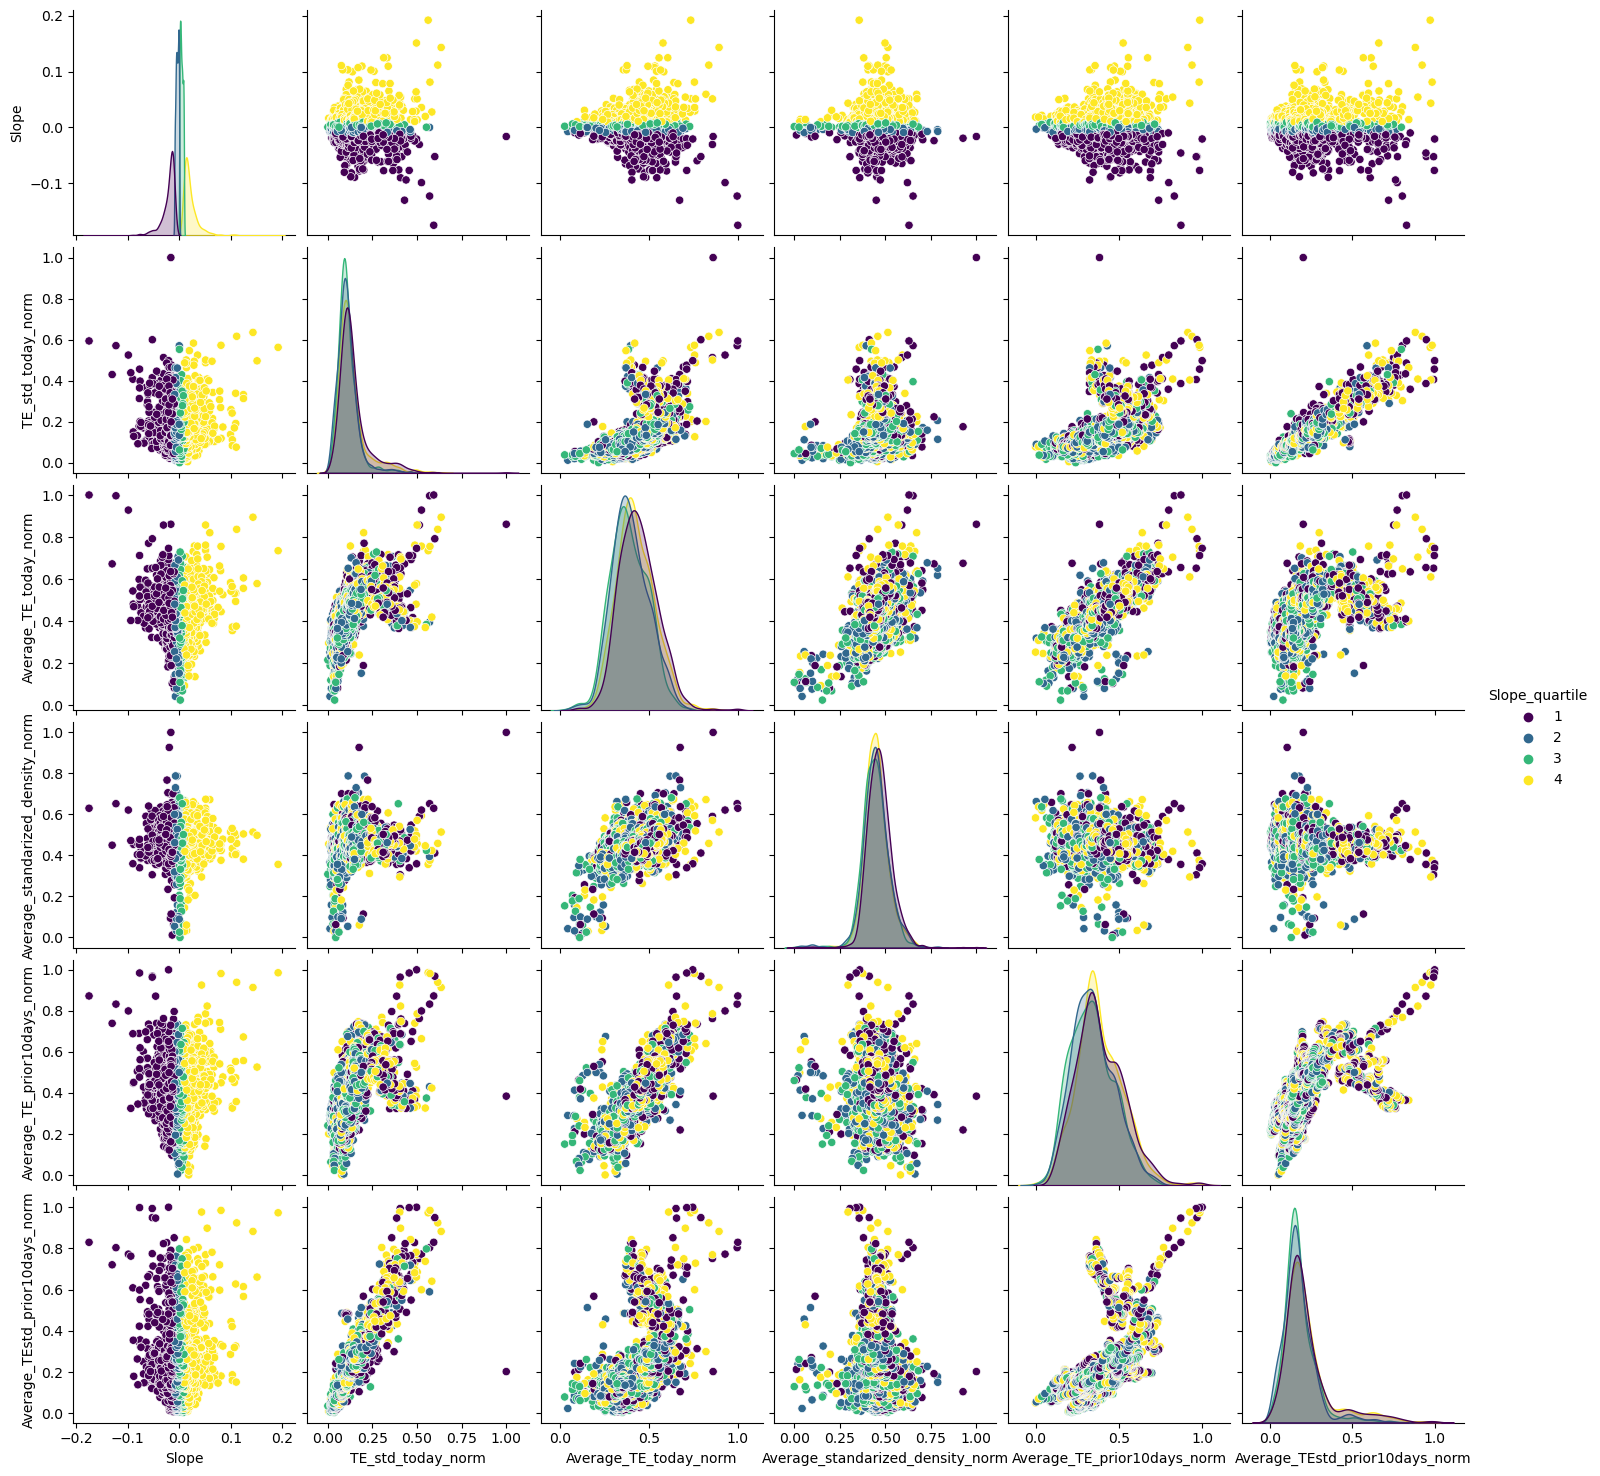

In [27]:
columns_for_pairplot = ['Slope', 'TE_std_today_norm', 'Average_TE_today_norm',
                        'Average_standarized_density_norm', 'Average_TE_prior10days_norm','Average_TEstd_prior10days_norm']
columns_for_pairplot_with_color = columns_for_pairplot + ['Slope_quartile']
sns.pairplot(feature_target_merged_class[columns_for_pairplot_with_color], hue='Slope_quartile', palette='viridis')
plt.show()

## KNN

Text(0, 0.5, 'Error Rate')

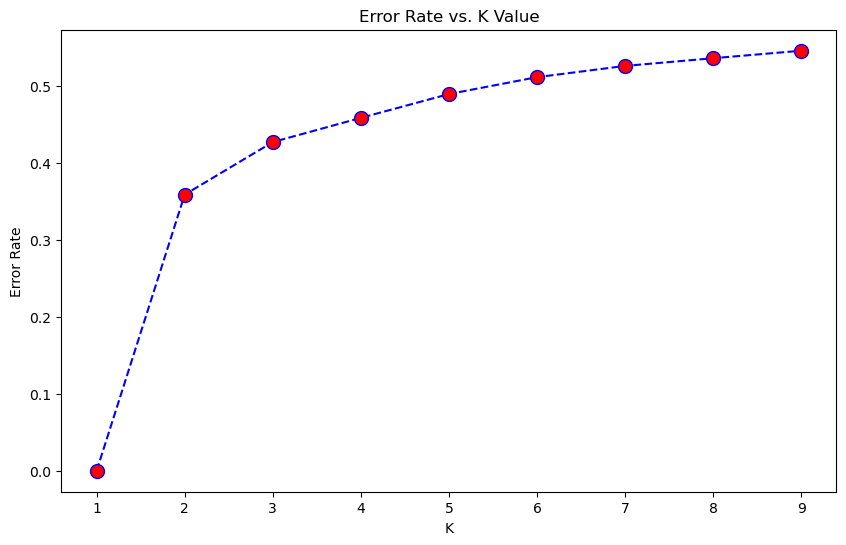

In [46]:
X = feature_target_merged_class[['Average_standarized_density_norm', 'Average_TE_prior10days_norm', 
                                 'Average_TE_today_norm', 'TE_std_today_norm','Average_TEstd_prior10days_norm']]
Y = feature_target_merged_class['Slope_quartile']

error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, Y)
    pred_i = knn.predict(X)
    error_rate.append(np.mean(pred_i != Y))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Accuracy:  0.5104826913700634


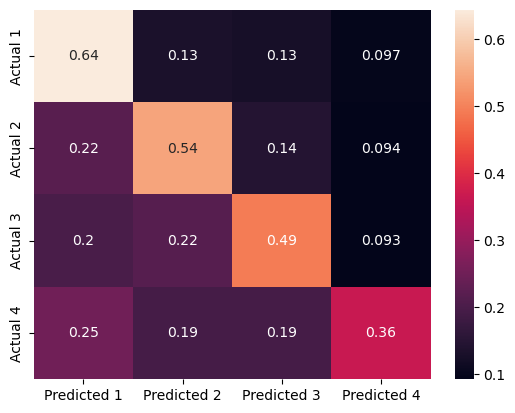

              precision    recall  f1-score   support

           1       0.49      0.64      0.56      1026
           2       0.50      0.54      0.52      1025
           3       0.52      0.49      0.50      1025
           4       0.56      0.36      0.44      1026

    accuracy                           0.51      4102
   macro avg       0.52      0.51      0.51      4102
weighted avg       0.52      0.51      0.51      4102



In [29]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X, Y)
Y_pred=knn.predict(X)

confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], colnames=['Predicted'])
cm_np = confusion_matrix.to_numpy()
cm_normalized = cm_np.astype('float') / cm_np.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_normalized, annot=True,xticklabels=['Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], 
      yticklabels=['Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])

print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()
print(classification_report(Y, Y_pred))

Accuracy:  0.2843216896831844


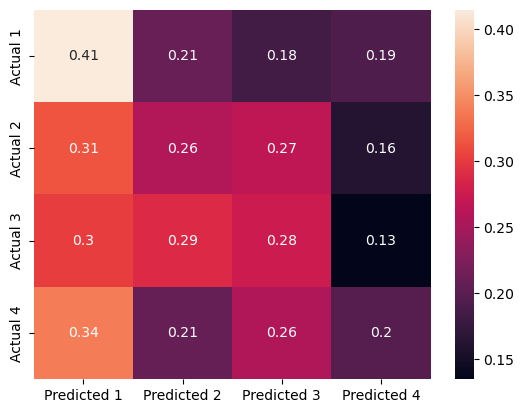

              precision    recall  f1-score   support

           1       0.28      0.41      0.34       287
           2       0.29      0.26      0.27       334
           3       0.28      0.28      0.28       312
           4       0.28      0.20      0.23       298

    accuracy                           0.28      1231
   macro avg       0.28      0.29      0.28      1231
weighted avg       0.28      0.28      0.28      1231



In [30]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=0)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)

confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
cm_np = confusion_matrix.to_numpy()
cm_normalized = cm_np.astype('float') / cm_np.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True,xticklabels=['Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], 
      yticklabels=['Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])

print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
plt.show()
print(classification_report(Y_test, Y_pred))

Accuracy:  0.25646026328620186


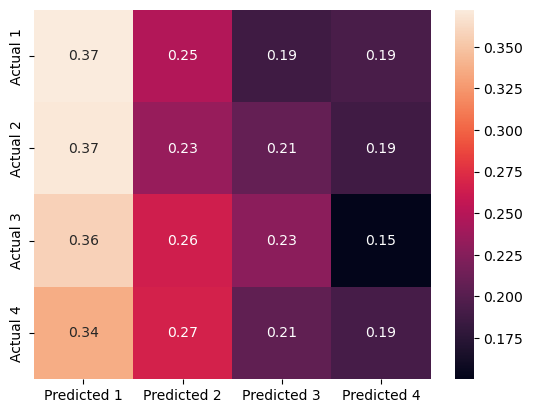

Classification Report:
              precision    recall  f1-score   support

           1       0.26      0.37      0.31      1026
           2       0.23      0.23      0.23      1025
           3       0.28      0.23      0.25      1025
           4       0.26      0.19      0.22      1026

    accuracy                           0.26      4102
   macro avg       0.26      0.26      0.25      4102
weighted avg       0.26      0.26      0.25      4102



In [31]:
knn = KNeighborsClassifier(n_neighbors=5)

Y_pred_cv = cross_val_predict(knn, X, Y, cv=5)

confusion_matrix = pd.crosstab(Y, Y_pred_cv, rownames=['Actual'], colnames=['Predicted'])
cm_np = confusion_matrix.to_numpy()
cm_normalized = cm_np.astype('float') / cm_np.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_normalized, annot=True,xticklabels=['Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], 
      yticklabels=['Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])

print('Accuracy: ',metrics.accuracy_score(Y, Y_pred_cv))
plt.show()

classification_rep = classification_report(Y, Y_pred_cv)
print(f'Classification Report:\n{classification_rep}')

## Random Forest

Accuracy:  0.9251584592881521


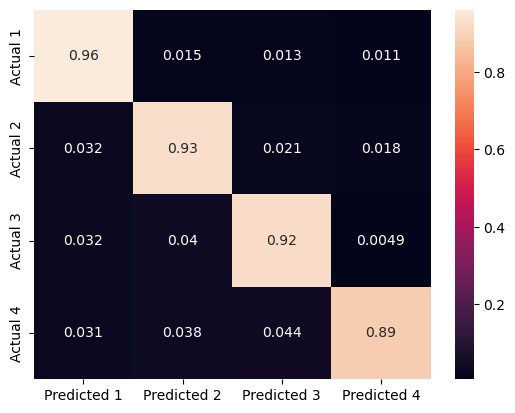

[0.192248224452018, 0.18777815952978058, 0.19520600893016507, 0.21954359025216091, 0.20522401683587543]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1026
           1       0.91      0.93      0.92      1025
           2       0.92      0.92      0.92      1025
           3       0.96      0.89      0.92      1026

    accuracy                           0.93      4102
   macro avg       0.93      0.93      0.93      4102
weighted avg       0.93      0.93      0.93      4102



In [47]:
clf = RandomForestClassifier(n_estimators=5)
clf.fit(X,Y)
Y_pred=clf.predict(X)

confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], colnames=['Predicted'])
cm_np = confusion_matrix.to_numpy()
cm_normalized = cm_np.astype('float') / cm_np.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True,xticklabels=['Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], 
      yticklabels=['Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])

print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

importances = list(clf.feature_importances_)
print (importances)
print(classification_report(Y, Y_pred))

Accuracy:  0.29406986190089357


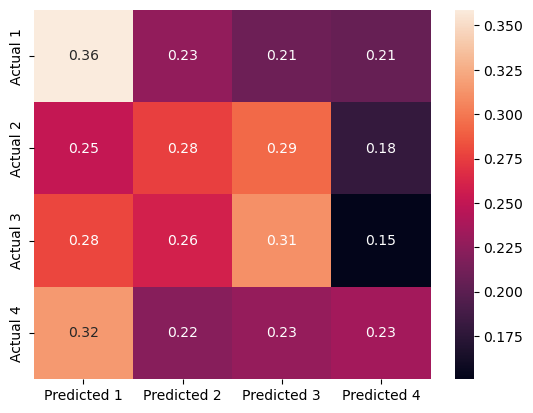

[0.19031547774717475, 0.19413943509170992, 0.20496904831250917, 0.2040260931327376, 0.20654994571586863]
              precision    recall  f1-score   support

           1       0.28      0.36      0.31       287
           2       0.30      0.28      0.29       334
           3       0.30      0.31      0.31       312
           4       0.30      0.23      0.26       298

    accuracy                           0.29      1231
   macro avg       0.29      0.30      0.29      1231
weighted avg       0.30      0.29      0.29      1231



In [32]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)

confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
cm_np = confusion_matrix.to_numpy()
cm_normalized = cm_np.astype('float') / cm_np.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True,xticklabels=['Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], 
      yticklabels=['Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])

print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
plt.show()

importances = list(clf.feature_importances_)
print (importances)
print(classification_report(Y_test, Y_pred))

Accuracy:  0.25182837640175526


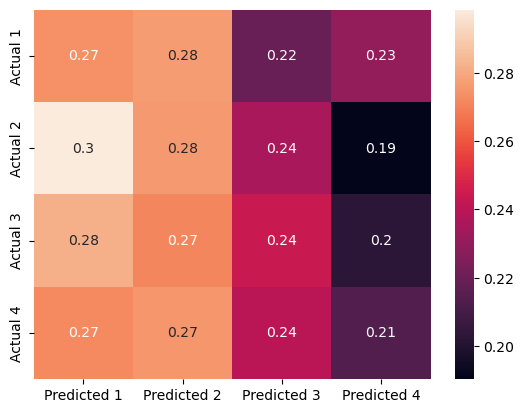

Classification Report:
              precision    recall  f1-score   support

           1       0.24      0.27      0.26      1026
           2       0.25      0.28      0.26      1025
           3       0.26      0.24      0.25      1025
           4       0.26      0.21      0.23      1026

    accuracy                           0.25      4102
   macro avg       0.25      0.25      0.25      4102
weighted avg       0.25      0.25      0.25      4102



In [33]:
clf = RandomForestClassifier(n_estimators=10)

Y_pred_cv = cross_val_predict(clf, X, Y, cv=5)

confusion_matrix = pd.crosstab(Y, Y_pred_cv, rownames=['Actual'], colnames=['Predicted'])
cm_np = confusion_matrix.to_numpy()
cm_normalized = cm_np.astype('float') / cm_np.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_normalized, annot=True,xticklabels=['Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], 
      yticklabels=['Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])

print('Accuracy: ',metrics.accuracy_score(Y, Y_pred_cv))
plt.show()

classification_rep = classification_report(Y, Y_pred_cv)
print(f'Classification Report:\n{classification_rep}')

# logistic Regression

Accuracy:  0.9173573866406631


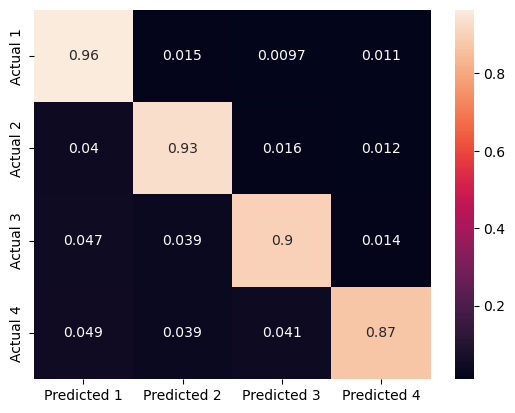

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1026
           1       0.91      0.93      0.92      1025
           2       0.93      0.90      0.92      1025
           3       0.96      0.87      0.91      1026

    accuracy                           0.92      4102
   macro avg       0.92      0.92      0.92      4102
weighted avg       0.92      0.92      0.92      4102



In [48]:
# clf = LogisticRegression(penalty='l1', solver='liblinear')
logistic_regression= LogisticRegression(penalty='l2', solver='liblinear')
clf.fit(X,Y)
Y_pred=clf.predict(X)

confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], colnames=['Predicted'])
cm_np = confusion_matrix.to_numpy()
cm_normalized = cm_np.astype('float') / cm_np.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True,xticklabels=['Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], 
      yticklabels=['Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])

print('Accuracy: ',metrics.accuracy_score(Y, Y_pred))
plt.show()

print(classification_report(Y, Y_pred))

Coefficients [-3.17001999 -0.32046044  0.02797342 -1.43657243] [[ 3.21069615  1.10263732  0.          2.96567563 -0.67889853]
 [-0.87873848  0.         -0.35932115 -0.15285505 -1.37979378]
 [ 0.         -0.03181422 -2.3620899  -0.79037045 -0.43982962]
 [-0.10881714  0.55347756  0.         -1.03834036  1.62904286]]
Accuracy:  0.314378554021121


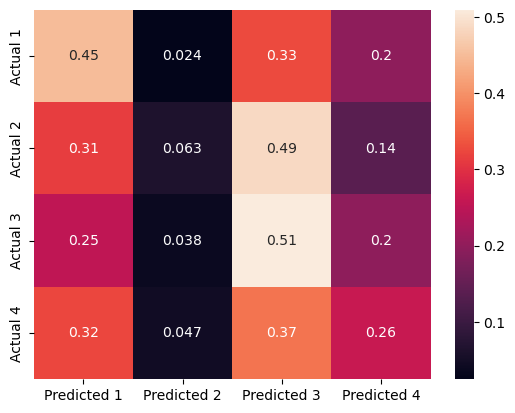

              precision    recall  f1-score   support

           1       0.32      0.45      0.37       287
           2       0.39      0.06      0.11       334
           3       0.30      0.51      0.38       312
           4       0.32      0.26      0.29       298

    accuracy                           0.31      1231
   macro avg       0.33      0.32      0.29      1231
weighted avg       0.33      0.31      0.28      1231



In [34]:
logistic_regression= LogisticRegression(penalty='l1', solver='liblinear')
#logistic_regression= LogisticRegression(penalty='l2', solver='liblinear')
logistic_regression.fit(X_train,Y_train)
Y_pred=logistic_regression.predict(X_test)

print('Coefficients', logistic_regression.intercept_, logistic_regression.coef_)

confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
cm_np = confusion_matrix.to_numpy()
cm_normalized = cm_np.astype('float') / cm_np.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True,xticklabels=['Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], 
      yticklabels=['Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])


print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
plt.show()

#print (X_test)
#print (Y_pred)

print(classification_report(Y_test, Y_pred))

Accuracy:  0.29449049244271086


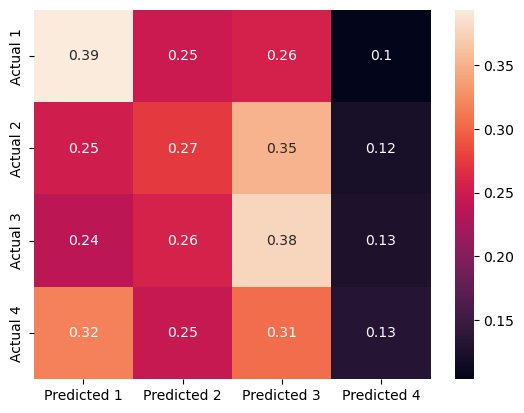

Classification Report:
              precision    recall  f1-score   support

           1       0.33      0.39      0.36      1026
           2       0.27      0.27      0.27      1025
           3       0.29      0.38      0.33      1025
           4       0.27      0.13      0.18      1026

    accuracy                           0.29      4102
   macro avg       0.29      0.29      0.28      4102
weighted avg       0.29      0.29      0.28      4102



In [35]:
logistic_regression= LogisticRegression(penalty='l1', solver='liblinear')

Y_pred_cv = cross_val_predict(logistic_regression, X, Y, cv=5)

confusion_matrix = pd.crosstab(Y, Y_pred_cv, rownames=['Actual'], colnames=['Predicted'])
cm_np = confusion_matrix.to_numpy()
cm_normalized = cm_np.astype('float') / cm_np.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_normalized, annot=True,xticklabels=['Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], 
      yticklabels=['Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])

print('Accuracy: ',metrics.accuracy_score(Y, Y_pred_cv))
plt.show()

classification_rep = classification_report(Y, Y_pred_cv)
print(f'Classification Report:\n{classification_rep}')

## XGboost

Accuracy: 0.9790346172598733


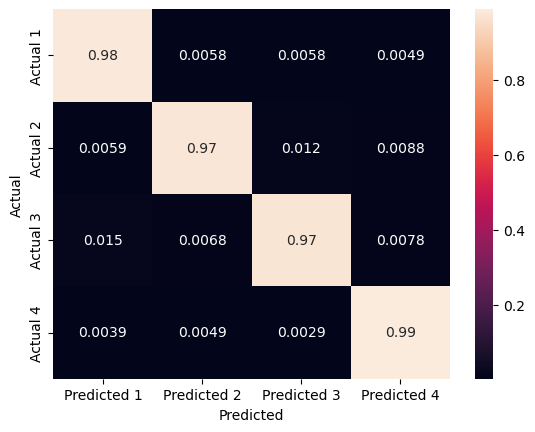

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1026
           1       0.98      0.97      0.98      1025
           2       0.98      0.97      0.98      1025
           3       0.98      0.99      0.98      1026

    accuracy                           0.98      4102
   macro avg       0.98      0.98      0.98      4102
weighted avg       0.98      0.98      0.98      4102



In [55]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
feature_target_merged_class['Slope_quartile'] = label_encoder.fit_transform(feature_target_merged_class['Slope_quartile'])

X = feature_target_merged_class[['Average_standarized_density_norm', 'Average_TE_prior10days_norm', 
               'Average_TE_today_norm', 'TE_std_today_norm','Average_TEstd_prior10days_norm']]
Y = feature_target_merged_class['Slope_quartile']

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

num_classes = len(np.unique(Y))


XGboost = xgb.XGBClassifier(
    objective='multi:softmax', 
    num_class=num_classes,
    max_depth=10,
    learning_rate=0.1,
    n_estimators=100
)
XGboost.fit(X, Y)
Y_pred = XGboost.predict(X)
Y_pred_original = label_encoder.inverse_transform(Y_pred)

accuracy = metrics.accuracy_score(Y, Y_pred)
print(f'Accuracy: {accuracy}')

confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], colnames=['Predicted'])
cm_np = confusion_matrix.to_numpy()
cm_normalized = cm_np.astype('float') / cm_np.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, xticklabels=['Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], 
      yticklabels=['Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
classification_rep = classification_report(Y, Y_pred)
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.29731925264013


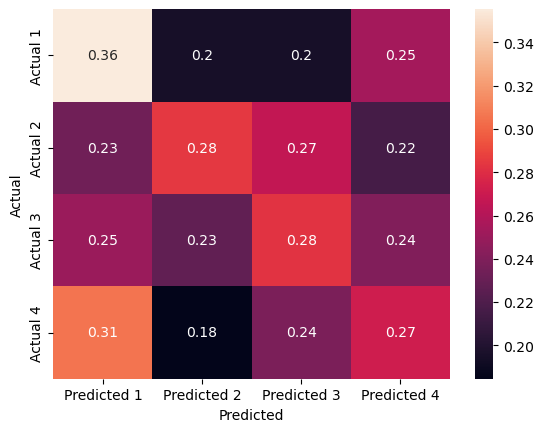

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.36      0.32       287
           1       0.34      0.28      0.31       334
           2       0.29      0.28      0.29       312
           3       0.27      0.27      0.27       298

    accuracy                           0.30      1231
   macro avg       0.30      0.30      0.30      1231
weighted avg       0.30      0.30      0.30      1231



In [36]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
feature_target_merged_class['Slope_quartile'] = label_encoder.fit_transform(feature_target_merged_class['Slope_quartile'])

X = feature_target_merged_class[['Average_standarized_density_norm', 'Average_TE_prior10days_norm',
                                 'Average_TE_today_norm', 'TE_std_today_norm','Average_TEstd_prior10days_norm']]
Y = feature_target_merged_class['Slope_quartile']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

num_classes = len(np.unique(Y))


XGboost = xgb.XGBClassifier(
    objective='multi:softmax', 
    num_class=num_classes,
    max_depth=10,
    learning_rate=0.1,
    n_estimators=100
)
XGboost.fit(X_train, Y_train)
Y_pred = XGboost.predict(X_test)
Y_pred_original = label_encoder.inverse_transform(Y_pred)
Y_test_original = label_encoder.inverse_transform(Y_test)


accuracy = metrics.accuracy_score(Y_test_original, Y_pred_original)
print(f'Accuracy: {accuracy}')

confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
cm_np = confusion_matrix.to_numpy()
cm_normalized = cm_np.astype('float') / cm_np.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, xticklabels=['Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], 
      yticklabels=['Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
classification_rep = classification_report(Y_test, Y_pred)
print(f'Classification Report:\n{classification_rep}')


Accuracy:  0.2645051194539249


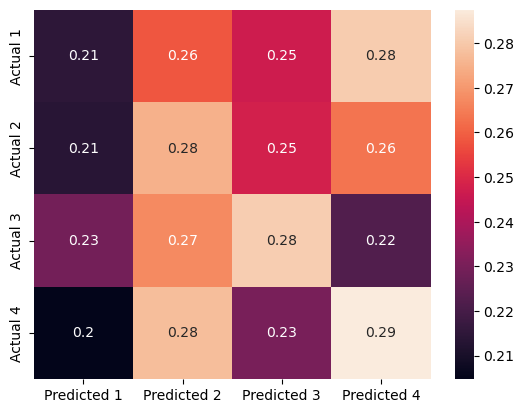

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.21      0.23      1026
           1       0.25      0.28      0.26      1025
           2       0.28      0.28      0.28      1025
           3       0.27      0.29      0.28      1026

    accuracy                           0.26      4102
   macro avg       0.26      0.26      0.26      4102
weighted avg       0.26      0.26      0.26      4102



In [37]:
XGboost = xgb.XGBClassifier(
    objective='multi:softmax', 
    num_class=num_classes,
    max_depth=10,
    learning_rate=0.1,
    n_estimators=100
)

Y_pred_cv = cross_val_predict(XGboost, X, Y, cv=5)

confusion_matrix = pd.crosstab(Y, Y_pred_cv, rownames=['Actual'], colnames=['Predicted'])
cm_np = confusion_matrix.to_numpy()
cm_normalized = cm_np.astype('float') / cm_np.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_normalized, annot=True,xticklabels=['Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], 
      yticklabels=['Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])

print('Accuracy: ',metrics.accuracy_score(Y, Y_pred_cv))
plt.show()

classification_rep = classification_report(Y, Y_pred_cv)
print(f'Classification Report:\n{classification_rep}')

## Neural Network

Accuracy: 0.35421745490004874
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.56      0.43      1026
           1       0.36      0.18      0.24      1025
           2       0.36      0.33      0.35      1025
           3       0.35      0.35      0.35      1026

    accuracy                           0.35      4102
   macro avg       0.36      0.35      0.34      4102
weighted avg       0.36      0.35      0.34      4102



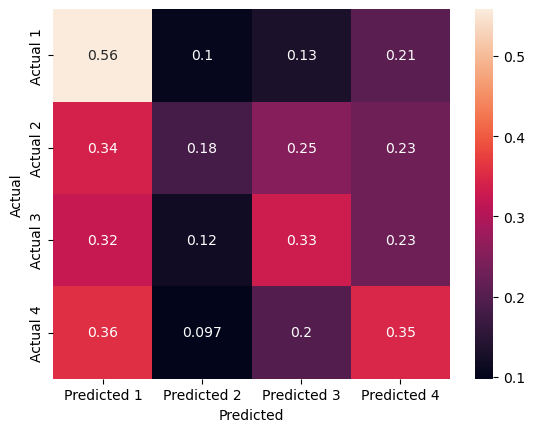

In [56]:
from sklearn.neural_network import MLPClassifier
X = feature_target_merged_class[['Average_standarized_density_norm', 'Average_TE_prior10days_norm', 
               'Average_TE_today_norm', 'TE_std_today_norm','Average_TEstd_prior10days_norm']]
Y = feature_target_merged_class['Slope_quartile']
# X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=0)
clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                       max_iter = 300,activation = 'relu',
                       solver = 'adam')
# clf = MLPClassifier(solver='lbfgs', 
#                    alpha=1e-2,
#                    hidden_layer_sizes=(2,), 
#                    random_state=1)
clf.fit(X, Y) 
Y_pred=clf.predict(X)
confusion_matrix = pd.crosstab(Y, Y_pred, rownames=['Actual'], colnames=['Predicted'])
cm_np = confusion_matrix.to_numpy()
cm_normalized = cm_np.astype('float') / cm_np.sum(axis=1)[:, np.newaxis]


accuracy = metrics.accuracy_score(Y, Y_pred)
print(f'Accuracy: {accuracy}')
plt.show()
sns.heatmap(cm_normalized, annot=True, xticklabels=['Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], 
      yticklabels=['Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')


classification_rep = classification_report(Y, Y_pred)
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.30463038180341184
Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.41      0.35       287
           1       0.38      0.16      0.22       334
           2       0.30      0.30      0.30       312
           3       0.29      0.37      0.32       298

    accuracy                           0.30      1231
   macro avg       0.32      0.31      0.30      1231
weighted avg       0.32      0.30      0.30      1231



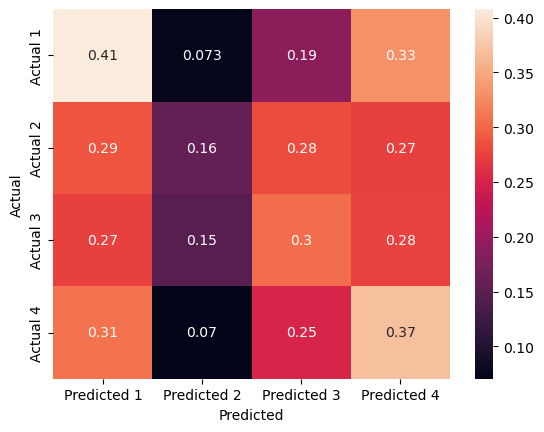

In [38]:
from sklearn.neural_network import MLPClassifier
X = feature_target_merged_class[['Average_standarized_density_norm', 'Average_TE_prior10days_norm',
                                 'Average_TE_today_norm', 'TE_std_today_norm','Average_TEstd_prior10days_norm']]
Y = feature_target_merged_class['Slope_quartile']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=0)
clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                       max_iter = 300,activation = 'relu',
                       solver = 'adam')
# clf = MLPClassifier(solver='lbfgs', 
#                    alpha=1e-2,
#                    hidden_layer_sizes=(2,), 
#                    random_state=1)
clf.fit(X_train, Y_train) 
Y_pred=clf.predict(X_test)
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
cm_np = confusion_matrix.to_numpy()
cm_normalized = cm_np.astype('float') / cm_np.sum(axis=1)[:, np.newaxis]


accuracy = metrics.accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy}')
plt.show()
sns.heatmap(cm_normalized, annot=True, xticklabels=['Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], 
      yticklabels=['Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')


classification_rep = classification_report(Y_test, Y_pred)
print(f'Classification Report:\n{classification_rep}')

Accuracy:  0.2664553876157972


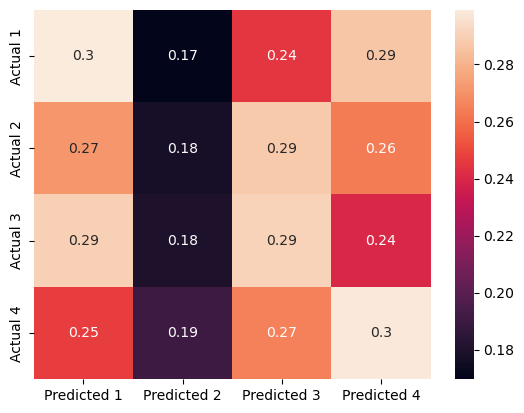

Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.30      0.28      1026
           1       0.25      0.18      0.21      1025
           2       0.27      0.29      0.28      1025
           3       0.27      0.30      0.29      1026

    accuracy                           0.27      4102
   macro avg       0.26      0.27      0.26      4102
weighted avg       0.26      0.27      0.26      4102



In [39]:
clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                       max_iter = 300,activation = 'relu',
                       solver = 'adam')
Y_pred_cv = cross_val_predict(clf, X, Y, cv=5)

confusion_matrix = pd.crosstab(Y, Y_pred_cv, rownames=['Actual'], colnames=['Predicted'])
cm_np = confusion_matrix.to_numpy()
cm_normalized = cm_np.astype('float') / cm_np.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_normalized, annot=True,xticklabels=['Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4'], 
      yticklabels=['Actual 1', 'Actual 2', 'Actual 3', 'Actual 4'])

print('Accuracy: ',metrics.accuracy_score(Y, Y_pred_cv))
plt.show()

classification_rep = classification_report(Y, Y_pred_cv)
print(f'Classification Report:\n{classification_rep}')

# Regression

In [40]:
X = feature_target_merged_class[['Average_standarized_density_norm', 'Average_TE_prior10days_norm', 
                                 'Average_TE_today_norm', 'TE_std_today_norm','Average_TEstd_prior10days_norm']]
Y = feature_target_merged_class['Slope']


## SVR

In [41]:
svr = SVR(kernel='rbf', C=1.0, epsilon=0.2) # C: Regularization parameter; epsilon:low:Points far from hyperplane considered in calculation
cv = KFold(n_splits=5, shuffle=True, random_state=42)  
mse_scores = cross_val_score(svr, X, Y, scoring='neg_mean_squared_error', cv=cv)
mse_scores = cross_val_score(svr, X, Y, scoring='neg_mean_squared_error')
mse_scores_positive = -mse_scores
mean_mse = np.mean(mse_scores_positive)
print(f'Mean Cross-Validated MSE: {mean_mse}')
print('Individual MSE Scores:', mse_scores_positive)
Y_pred_cv = cross_val_predict(svr, X, Y, cv=cv)

Mean Cross-Validated MSE: 0.00047871380293741997
Individual MSE Scores: [0.00024245 0.00071579 0.00028464 0.00034624 0.00080444]


In [42]:
df_predicted_actual = pd.DataFrame({'Predicted_Mkt-RF': Y_pred_cv, 'Actual_Mkt-RF':Y})
r_squared = r2_score(df_predicted_actual['Actual_Mkt-RF'], df_predicted_actual['Predicted_Mkt-RF'])
print(f'R-squared: {r_squared}')

R-squared: -0.6559652278881327


## Neural Network Regressor

In [43]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=0)
# cv = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = cross_val_score(nn, X, Y, scoring='neg_mean_squared_error', cv=cv)
mse_scores_positive = -mse_scores
mean_mse = np.mean(mse_scores_positive)
print(f'Mean Cross-Validated MSE: {mean_mse}')
print('Individual MSE Scores:', mse_scores_positive)
Y_pred_cv = cross_val_predict(nn, X, Y, cv=cv)

Mean Cross-Validated MSE: 0.000409580433262699
Individual MSE Scores: [0.00036992 0.00047083 0.00046391 0.00034016 0.00040308]


In [44]:
df_predicted_actual = pd.DataFrame({'Predicted_Mkt-RF': Y_pred_cv, 'Actual_Mkt-RF':Y})
r_squared = r2_score(df_predicted_actual['Actual_Mkt-RF'], df_predicted_actual['Predicted_Mkt-RF'])
print(f'R-squared: {r_squared}')

R-squared: -0.02496554086087288


# Auto TS

In [57]:
from autots import AutoTS, load_daily


In [59]:
feature_target_merged_class['Date'] = pd.to_datetime(feature_target_merged_class['Date'], format='%Y%m%d', errors='coerce')
feature_target_merged_class.set_index('Date', inplace=True)

In [61]:
feature_target_merged_class2 = feature_target_merged_class.drop('Slope', axis=1)

In [62]:
feature_target_merged_class2

,TE_std_today_norm,Average_TE_today_norm,Average_TEstd_prior10days_norm,Average_standarized_density_norm,Average_TE_prior10days_norm,Slope_quartile
Date,,,,,,
2004-09-09,0.019971,0.339837,0.008509,0.520012,0.196191,2
2004-09-10,0.004823,0.295090,0.009955,0.455847,0.200286,3
2004-09-13,0.019593,0.302993,0.007425,0.460908,0.206793,2
2004-09-14,0.026529,0.305412,0.006135,0.450528,0.217705,1
2004-09-15,0.020121,0.305130,0.007622,0.438987,0.227599,1
...,...,...,...,...,...,...
2020-12-24,0.187274,0.151779,0.512573,0.089414,0.499708,1
2020-12-28,0.317320,0.440427,0.543996,0.415970,0.454013,0
2020-12-29,0.332700,0.480357,0.541396,0.462506,0.447261,1


Data frequency is: B, used frequency is: B
Model Number: 1 with model ARIMA in generation 0 of 4
Model Number: 2 with model AverageValueNaive in generation 0 of 4
Model Number: 3 with model AverageValueNaive in generation 0 of 4
Model Number: 4 with model AverageValueNaive in generation 0 of 4
Model Number: 5 with model DatepartRegression in generation 0 of 4
Model Number: 6 with model DatepartRegression in generation 0 of 4
Model Number: 7 with model DatepartRegression in generation 0 of 4
Model Number: 8 with model DatepartRegression in generation 0 of 4



Epoch 1/50

133/133 [==============================] - 7s 5ms/step - loss: 0.3983
Epoch 2/50
133/133 [==============================] - 1s 5ms/step - loss: 0.3968
Epoch 3/50
133/133 [==============================] - 1s 4ms/step - loss: 0.3963
Epoch 4/50
133/133 [==============================] - 1s 4ms/step - loss: 0.3960
Epoch 5/50
133/133 [==============================] - 1s 4ms/step - loss: 0.3955
Epoch 6/50
133/133 [========

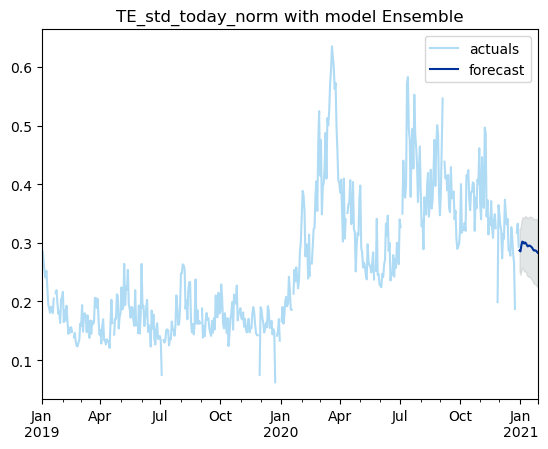

In [63]:
long = False
model = AutoTS(
    forecast_length=21,
    frequency='infer',
    prediction_interval=0.9,
    ensemble='auto',
    model_list="fast_parallel",  # "superfast", "default", "fast_parallel"
    transformer_list="fast",  # "superfast",
    drop_most_recent=1,
    max_generations=4,
    num_validations=2,
    validation_method="backwards"
)
model = model.fit(
    feature_target_merged_class2,
    date_col='datetime' if long else None,
    value_col='value' if long else None,
    id_col='series_id' if long else None,
)

prediction = model.predict()
# plot a sample
prediction.plot(model.df_wide_numeric,
                series=model.df_wide_numeric.columns[0],
                start_date="2019-01-01")
# Print the details of the best model
print(model)


In [ ]:
# point forecasts dataframe
forecasts_df = prediction.forecast
# upper and lower forecasts
forecasts_up, forecasts_low = prediction.upper_forecast, prediction.lower_forecast

# accuracy of all tried model results
model_results = model.results()
# and aggregated from cross validation
validation_results = model.results("validation")

In [ ]:
validation_results

,ID,Model,ModelParameters,TransformationParameters,Ensemble,Runs,smape,mae,rmse,made,...,dwd_weighted,matse_weighted,containment_weighted,contour_weighted,TotalRuntimeSeconds,Score,lowest_series_mape,lowest_series_mape_name,highest_series_mape,highest_series_mape_name
0,0007006426da46a570e323a62933db9b,UnivariateMotif,"{""window"": 10, ""point_method"": ""midhinge"", ""di...","{""fillna"": ""ffill_mean_biased"", ""transformatio...",0,1,34.540842,0.267918,0.311273,2.351995,...,10.488919,0.00000,0.492063,0.539683,4.141700,24.012400,10.975565,Average_TE_prior10days_norm,86.906694,Slope_quartile
1,0081e99515a764bf9746c992e18e7905,SectionalMotif,"{""window"": 15, ""point_method"": ""midhinge"", ""di...","{""fillna"": ""rolling_mean"", ""transformations"": ...",0,3,29.349088,0.263247,0.285971,1.258713,...,8.906752,0.02881,0.195767,0.518519,0.012267,26.930839,9.109711,Average_standarized_density_norm,93.765965,Slope_quartile
2,008b083605243e6109128f6d0d270ca0,Theta,"{""deseasonalize"": true, ""difference"": false, ""...","{""fillna"": ""mean"", ""transformations"": {""0"": ""D...",0,1,29.219039,0.811603,0.855958,1.163918,...,6.382466,0.00000,0.928571,0.404762,3.250100,36.009732,6.247238,Average_TE_prior10days_norm,312.549446,Slope_quartile
3,009e1246f72b441efecac3e651144d16,ETS,"{""damped_trend"": false, ""trend"": null, ""season...","{""fillna"": ""ffill"", ""transformations"": {""0"": ""...",0,1,23.872094,0.264934,0.343831,1.077151,...,7.281188,0.00000,0.928571,0.555556,2.310900,32.347946,8.500647,Average_TEstd_prior10days_norm,91.287414,Slope_quartile
4,00e0a0cc2a11671c486852846b914725,ARDL,"{""lags"": 2, ""trend"": ""n"", ""order"": 1, ""causal""...","{""fillna"": ""rolling_mean_24"", ""transformations...",0,1,34.762332,106.673022,476.069735,7392.285299,...,137082.080622,0.00000,0.603175,0.428571,0.443100,23371.908623,19905.220027,Average_TE_today_norm,21231.935971,Slope_quartile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,ff67d72650f442ea46608945727d5d70,Theta,"{""deseasonalize"": true, ""difference"": true, ""u...","{""fillna"": ""mean"", ""transformations"": {""0"": ""C...",0,1,23.872584,0.226970,0.279345,1.082947,...,8.560369,0.00000,0.833333,0.412698,7.246600,26.910062,5.150588,Average_TE_prior10days_norm,76.504631,Slope_quartile
694,ff723ab33f8c50b7855285a05dd16024,VAR,"{""regression_type"": null, ""maxlags"": 5, ""ic"": ...","{""fillna"": ""ffill"", ""transformations"": {""0"": ""...",0,1,24.908422,0.234099,0.263817,1.085221,...,6.781723,0.00000,0.698413,0.579365,0.248600,17.556501,5.496853,Average_TEstd_prior10days_norm,83.311138,Slope_quartile
695,ffb384507f1e6b316782ea51d6ef4d82,FFT,"{""n_harmonics"": 5000, ""detrend"": ""linear""}","{""fillna"": ""pchip"", ""transformations"": {""0"": ""...",0,1,29.657386,0.275958,0.324513,1.435135,...,3.921178,0.00000,0.865079,0.396825,2.213100,24.519608,10.986548,Average_TE_prior10days_norm,93.310580,Slope_quartile
696,ffc1682a941b1d884e7229f17b8dd6c8,DatepartRegression,"{""regression_model"": {""model"": ""Adaboost"", ""mo...","{""fillna"": ""rolling_mean_24"", ""transformations...",0,1,62.811237,0.348394,0.380749,1.616835,...,10.350897,0.00000,0.555556,0.484127,1.693900,43.599986,9.925258,Average_standarized_density_norm,189.265902,Average_TEstd_prior10days_norm
